In [4]:
import pandas as pd

column_names = [
    'variance', 'skewness', 'curtosis', 'entropy', 'class',    
]

data = pd.read_csv(r'C:\Users\furka\Desktop\489ml\hw2\data\data_banknote_authentication.txt', header=None, names=column_names)


In [5]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Data is initialized

In [6]:
print(data.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


We can see some more details by using .describe()

In [7]:
print(data.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


There isnt any null values so no need to do anything here

In [8]:
print(data.dtypes)

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object


And we can see the types if there was anything unexpected (the dataset already specifies the types) we could have acted upon it.

In [9]:
from sklearn.preprocessing import MinMaxScaler

Here I define the columns which I want to normalize. Excluding classes as they are not attributes rather they are classifications

In [10]:
numerical_cols = data.columns.difference(['class'])

In [11]:
data[numerical_cols] = MinMaxScaler().fit_transform(data[numerical_cols])

After normalization this is how my data looks

In [12]:
data

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


In [13]:
from sklearn.preprocessing import StandardScaler

data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])

In [14]:
data

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [15]:
print(data.describe())

           variance      skewness      curtosis       entropy        class
count  1.372000e+03  1.372000e+03  1.372000e+03  1.372000e+03  1372.000000
mean   2.485864e-16 -2.071553e-16 -8.286213e-17  4.479734e-16     0.444606
std    1.000365e+00  1.000365e+00  1.000365e+00  1.000365e+00     0.497103
min   -2.630737e+00 -2.675252e+00 -1.551303e+00 -3.502703e+00     0.000000
25%   -7.765474e-01 -6.188189e-01 -6.899455e-01 -5.817379e-01     0.000000
50%    2.197423e-02  6.771828e-02 -1.812706e-01  2.880644e-01     0.000000
75%    8.402427e-01  8.338757e-01  4.135174e-01  7.553713e-01     1.000000
max    2.249008e+00  1.879908e+00  3.836586e+00  1.733680e+00     1.000000


We finished The preperations of the data than we can start learning.

I start by splitting my data to training and testing 80/20

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data.drop('class', axis=1).values.astype(np.float64)
y = data['class'].values.astype(np.int64)
    
#Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  
    stratify=y 
)

We now train with training data

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Then print the accuracy

In [20]:
print("Test accuracy:", clf.score(X_test, y_test))

Test accuracy: 0.9927272727272727


Accuracy is near perfect still lets try experimenting with depth min sample split etc.

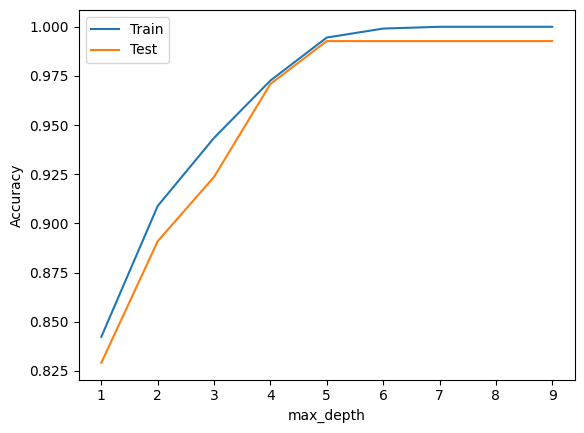

In [21]:
import matplotlib.pyplot as plt

train_scores, test_scores = [], []
depths = range(1, 10)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Max depth clearly increases accuracy up until 5 max depth after that it plauteus.

In [23]:
splits = [2, 5, 10, 20]

for split in splits:
    model = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    print(f"min_samples_split={split}: Test accuracy = {model.score(X_test, y_test):.3f}")

min_samples_split=2: Test accuracy = 0.993
min_samples_split=5: Test accuracy = 0.993
min_samples_split=10: Test accuracy = 0.993
min_samples_split=20: Test accuracy = 0.989


Over splitting even reduced some accuracy

In [24]:
for crit in ['gini', 'entropy']:
    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)
    print(f"Criterion '{crit}': Test accuracy = {model.score(X_test, y_test):.3f}")

Criterion 'gini': Test accuracy = 0.993
Criterion 'entropy': Test accuracy = 0.993


Criterion really didnt changed the results.

Classification Report:
              precision    recall  f1-score   support

     0: fake       1.00      0.99      0.99       153
1: authentic       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



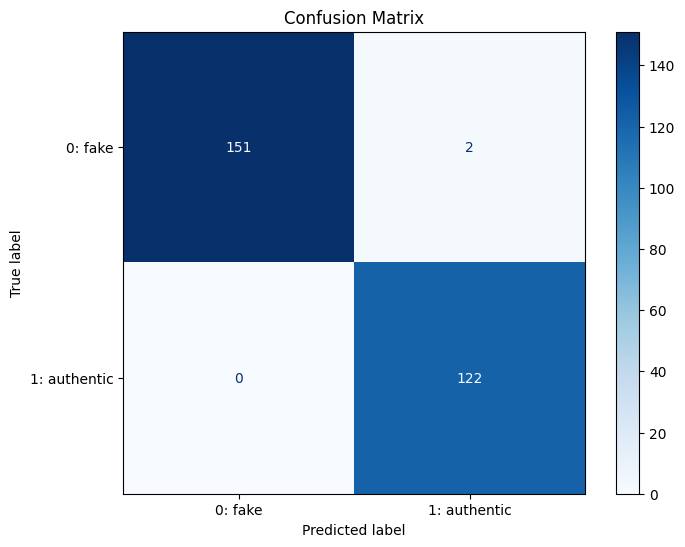

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

names = [
    '0: fake', '1: authentic',   
]


# get predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=names))

#  Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=names,
    cmap="Blues",
    ax=ax
)
plt.title("Confusion Matrix")
plt.show()

In [53]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

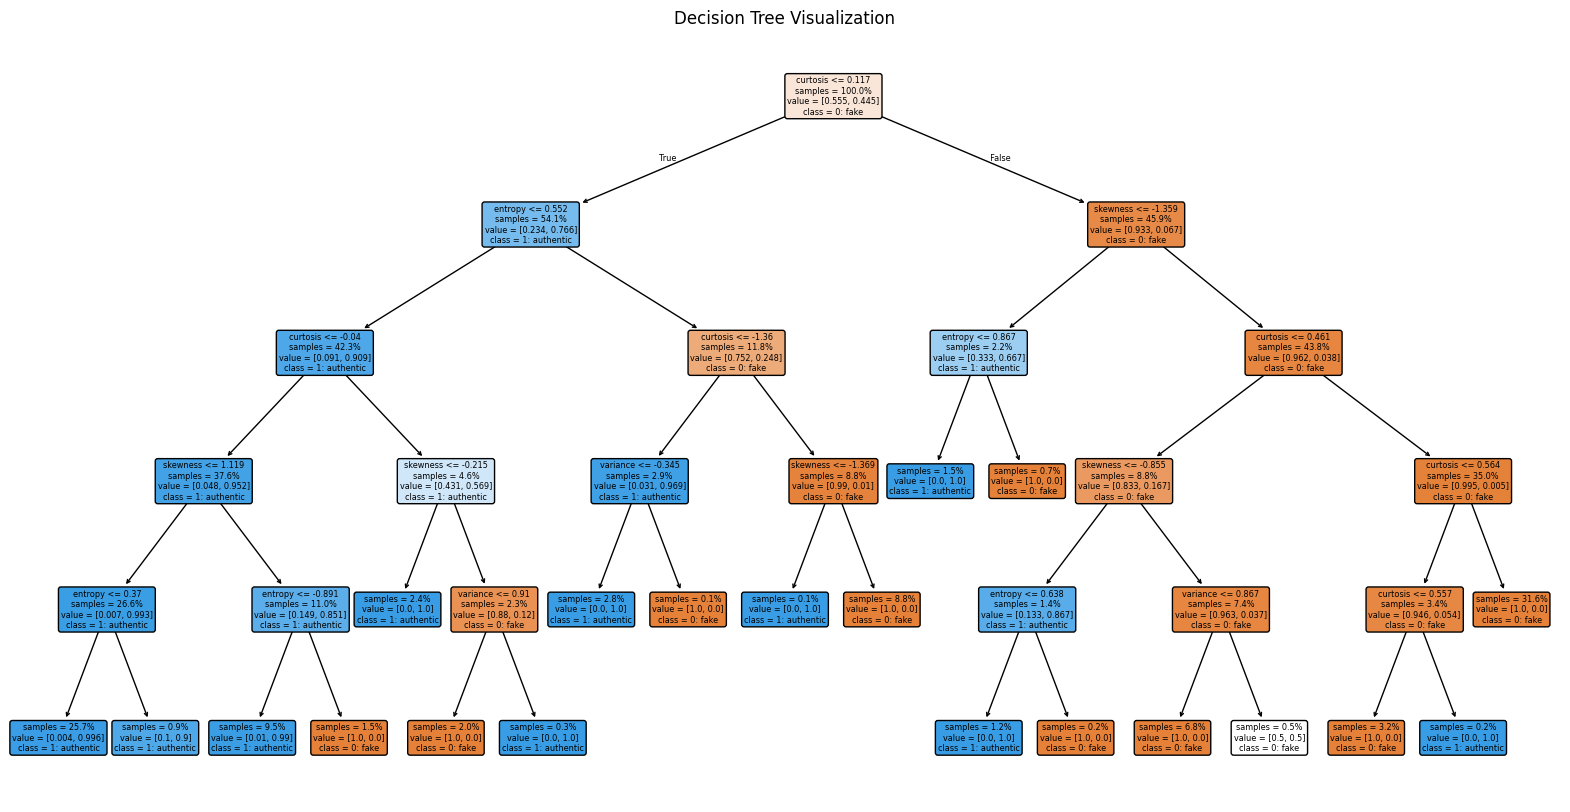

In [54]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust size for readability
plot_tree(
    clf,
    feature_names=numerical_cols,  # Use dataset feature names
    class_names=names,     # Use dataset class names
    filled=True,               # Color-code classes
    rounded=True,              # Rounded node edges
    impurity=False,            # Hide Gini/Entropy values (for simplicity)
    proportion=True            # Show proportions instead of counts
)
plt.title("Decision Tree Visualization")
plt.show()

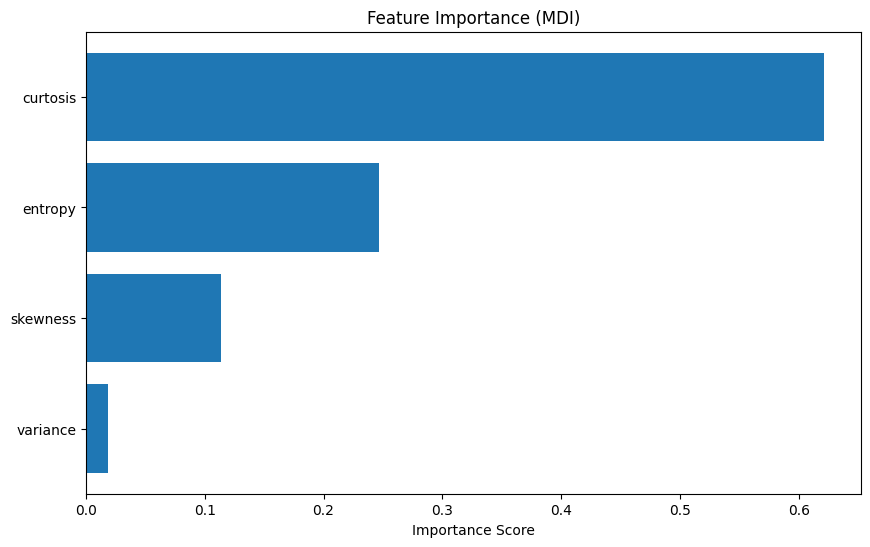

In [56]:

importance = clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot
plt.figure(figsize=(10, 6))
plt.barh(pos, importance[sorted_idx], align='center')
plt.yticks(pos, np.array(numerical_cols)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Importance Score")
plt.show()